In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

In [23]:
# loading the data in 

file_path = Path("not for git copy/test_3.csv")

df = pd.read_csv(file_path)

df = pd.DataFrame(df)

scoreboard_df = df[["play_id",
                    "game_id",
                    "play_type",
                    "posteam",
                    "down", 
                    "ydstogo",
                    "yrdln",
                    "yardline_100",
                    "qtr", 
                    "time", 
                    "play_clock",
                    "posteam_timeouts_remaining",
                    "defteam_timeouts_remaining",
                    "posteam_score",
                    "defteam_score"
                   ]]

scoreboard_df

,play_id,game_id,play_type,posteam,down,ydstogo,yrdln,yardline_100,qtr,time,play_clock,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score
0,1.0,2021_01_ARI_TEN,NaN,NaN,NaN,0.0,ARI 35,NaN,1.0,15:00,0,NaN,NaN,NaN,NaN
1,40.0,2021_01_ARI_TEN,kickoff,TEN,NaN,0.0,ARI 35,35.0,1.0,15:00,0,3.0,3.0,0.0,0.0
2,55.0,2021_01_ARI_TEN,run,TEN,1.0,10.0,TEN 25,75.0,1.0,15:00,7,3.0,3.0,0.0,0.0
3,76.0,2021_01_ARI_TEN,pass,TEN,2.0,13.0,TEN 22,78.0,1.0,14:23,9,3.0,3.0,0.0,0.0
4,100.0,2021_01_ARI_TEN,pass,TEN,3.0,10.0,TEN 25,75.0,1.0,13:42,8,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,3930.0,2021_22_LA_CIN,run,CIN,3.0,1.0,LA 49,49.0,4.0,00:48,7,2.0,3.0,20.0,23.0
50708,3951.0,2021_22_LA_CIN,no_play,NaN,NaN,0.0,LA 49,NaN,4.0,00:43,0,NaN,NaN,NaN,NaN
50709,3968.0,2021_22_LA_CIN,pass,CIN,4.0,1.0,LA 49,49.0,4.0,00:43,12,1.0,3.0,20.0,23.0
50710,3990.0,2021_22_LA_CIN,qb_kneel,LA,1.0,10.0,LA 49,51.0,4.0,00:39,4,3.0,1.0,23.0,20.0


In [24]:
# seperate play type counts
playtype_count = df.groupby(["play_type"]).count()["posteam"]
playtype_count

play_type
extra_point     1321
field_goal      1076
kickoff         2912
no_play         2575
pass           21010
punt            2187
qb_kneel         408
qb_spike          74
run            14756
Name: posteam, dtype: int64

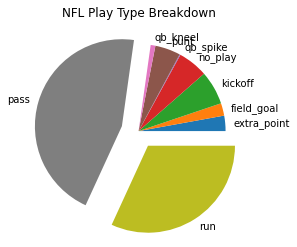

In [40]:
# Import Library

import matplotlib.pyplot as plt

# Define Data Coordinates

play_type= ["pass", "run", "extra_point", "field_goal", "kickoff", "no_play", "qb_spike", "punt", "qb_kneel"]

pt_count = [21020, 1475, 1321, 1076, 2912, 2575, 74, 2187, 408, 6]

# Explosion Value

explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0.2)

# Plot

plt.pie(pt_count, labels=play_type, explode=explode) 

# Title

plt.title('NFL Play Type Breakdown')

# Display

plt.show()

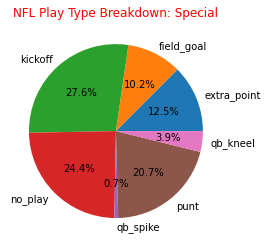

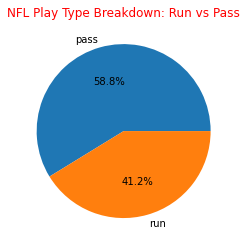

In [45]:
# Import Library

import matplotlib.pyplot as plt

# Create first chart.

plt.figure(0)
x = [1321, 1076, 2912, 2575, 74, 2187, 408]
play_type= ["extra_point", "field_goal", "kickoff", "no_play", "qb_spike", "punt", "qb_kneel"]

plt.pie(x, labels = play_type, 
        autopct='%.1f%%')
plt.title('NFL Play Type Breakdown: Special', color='r')

# Create second chart.

plt.figure(1)
x = [21020, 14756]
offense_play_type = ["pass", "run"]
plt.pie(x, labels = offense_play_type,  
        autopct='%.1f%%')
plt.title('NFL Play Type Breakdown: Run vs Pass', color='r')

# Show all figures

plt.show() 